# Assignment 5 - Risk



Task : Write a program (or notebook) called assignment_5_risk (.py or .ipynb)

The program should simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.

One battle round is one shake of the attacker and defender dice.

+ Rules of Risk

In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

- Each side looses troops depending on the following rules:


1. The two top dice are compared (ie the attackers top dice roll with the defenders top dice roll) 

   If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)

2. The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)

   If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)

#### by: Rodrigo de Martino Ucedo

In [417]:
# Numerical arrays.
import numpy as np
# Plotting.
import matplotlib.pyplot as plt
# Graphic manipulation.
import seaborn as sns 

In [408]:
# A single battle round simulation.
def simulate_battle():
    # Attacker rolls 3 dice.
    attacker_dice = np.sort(np.random.randint(1, 7, 3))[::-1]
    # Defender rolls 2 dice.
    defender_dice = np.sort(np.random.randint(1, 7, 2))[::-1]
    
    # Print the dice rolls results.
    print(f"Attacker's dice: {attacker_dice}")
    print(f"Defender's dice: {defender_dice}")
    
    # Initialize the victories.
    attacker_losses = 0
    defender_losses = 0
    
    # Compare the two top dice, attacker's vs defender's.
    if attacker_dice[0] > defender_dice[0]:
        defender_losses += 1  
    else:
        attacker_losses += 1  
    
    # Compare the next two highest dice, attacker's vs defender's.
    if attacker_dice[1] > defender_dice[1]:
        defender_losses += 1  
    else:
        attacker_losses += 1 
    
    # Determine the winner.
    if attacker_losses > defender_losses:
        winner = "Defender" # Attacker's loses 2 troops.
    elif attacker_losses < defender_losses:
        winner = "Attacker" # Defender's loses 2 troops.
    else:
        winner = "Tie"  # In this case both sides loses 1 troop.
    
    # Return the losses and the winner.
    return attacker_losses, defender_losses, winner, attacker_dice, defender_dice

# Simulate one battle round.
attacker_vic, defender_vic, winner, attacker_dice, defender_dice = simulate_battle()

# Print the final result of the battle.
print(f"\nBattle result: Attacker Victories = {attacker_vic}, Defender Victories = {defender_vic}")
print(f"Winner: {winner}")

Attacker's dice: [6 6 5]
Defender's dice: [6 1]

Battle result: Attacker Victories = 1, Defender Victories = 1
Winner: Tie


Attacker's dice: [6 4 3]
Defender's dice: [5 5]
Attacker's dice: [6 4 2]
Defender's dice: [5 3]
Attacker's dice: [3 3 1]
Defender's dice: [6 5]
Attacker's dice: [5 5 2]
Defender's dice: [4 3]
Attacker's dice: [6 4 3]
Defender's dice: [2 1]
Attacker's dice: [5 4 2]
Defender's dice: [6 2]
Attacker's dice: [6 4 4]
Defender's dice: [2 1]
Attacker's dice: [3 3 1]
Defender's dice: [6 1]
Attacker's dice: [2 1 1]
Defender's dice: [6 1]
Attacker's dice: [2 1 1]
Defender's dice: [3 3]
Attacker's dice: [6 6 4]
Defender's dice: [5 1]
Attacker's dice: [4 4 1]
Defender's dice: [5 1]
Attacker's dice: [5 3 1]
Defender's dice: [2 1]
Attacker's dice: [5 3 1]
Defender's dice: [6 2]
Attacker's dice: [5 2 1]
Defender's dice: [6 5]
Attacker's dice: [5 4 4]
Defender's dice: [5 4]
Attacker's dice: [6 2 1]
Defender's dice: [4 2]
Attacker's dice: [5 2 2]
Defender's dice: [4 2]
Attacker's dice: [6 5 5]
Defender's dice: [6 2]
Attacker's dice: [4 2 2]
Defender's dice: [5 3]
Attacker's dice: [2 1 1]
Defender's dice

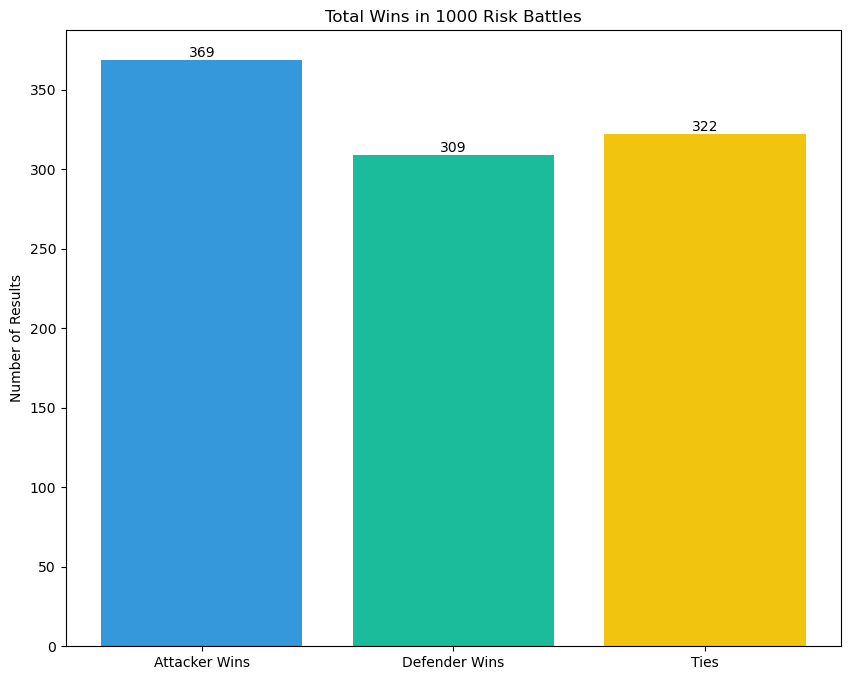

In [422]:
# 1000 battle simulations.
attacker_wins = 0
defender_wins = 0
ties = 0 
attacker_losses_total = []
defender_losses_total = []
winner_history = [] 

for _ in range(1000):
    attacker_losses, defender_losses, winner, _, _ = simulate_battle()  # _, _ Ignore the dice rolls
    attacker_losses_total.append(attacker_losses)
    defender_losses_total.append(defender_losses)
    winner_history.append(winner)
    
    # Track the winner
    if winner == "Attacker":
        attacker_wins += 1
    elif winner == "Defender":
        defender_wins += 1
    else:
        ties += 1

# Print the result.
print(f"\nTotal Attacker Wins: {attacker_wins}")
print(f"Total Defender Wins: {defender_wins}")
print(f"Ties: {ties}")

# Bar plot of total wins for each side, including ties.
plt.figure(figsize=(10, 8))
bars = plt.bar(['Attacker Wins', 'Defender Wins', 'Ties'], [attacker_wins, defender_wins, ties], color=['#3498db', '#1abc9c', '#f1c40f'])
plt.title('Total Wins in 1000 Risk Battles')
plt.ylabel('Number of Results')
# Adding values on top of the bars.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

+ For the last few marks.

A more complicated version simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out, and plots the results.